In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pathlib

In [2]:
save_plots = True

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_davinci_parsed_logs/'
                  + 'convergence_oscillation_study/'
)
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

# Import MC data

In [4]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions
## Feature component functions
We use nested information (lists within the DataFrame), which make it a bit hard to single out individual components. These functions help with that.

In [5]:
## Use 1,2,3 instead of 0,1,2. Trust me, it's easier.
def Feature1DComponent(series, component):
    return series.map(lambda x: x[component-1])

In [6]:
def Feature2DComponent(series, row, column):
    return series.map(lambda x: x[row-1][column-1])

In [7]:
def FeatureCoordinate(series, coordinate):  
    coordToComponent = {'x': 1, 'y': 2, 'z': 3}
    return Feature1DComponent(series, coordToComponent[coordinate])

## Plotting functions

In [8]:
def PlotVertexIterations(eventIndex, coordinate):
    coordToComponent = {'x': 0, 'y': 1, 'z': 2}
    coordToColor = {'x': 'tab:blue', 'y': 'tab:orange', 'z':'tab:green'}
    convergenceToString = {
        'Converged': 'Converged',
        'NonConverged': 'Failed'
    }
    
    if coordinate == 'z':
        unitOfMeasurement = 'm'
        scale = 1000
    else:
        unitOfMeasurement = 'mm'
        scale = 1
    
    ticks = range(0, df_events['numberOfIterations'][eventIndex]+1)
    
    ## Seed is iteration 0
    values = (
        [df_events['seed_vtx'][eventIndex][coordToComponent[coordinate]]/scale]
        + [el[coordToComponent[coordinate]]/scale for el in df_events['iter_currentVertices'][eventIndex]]
    )
    
    plt.plot(
        ticks,
        values,
        color=coordToColor[coordinate],
        marker='x'
    )
    plt.title(
        "$" + coordinate + "_{vtx}^\Lambda$ through VertexFitter iterations"
        + "\n(" + convergenceToString[df_events['status'][eventIndex]] + " event)"
    )
    plt.grid()
    plt.xlabel("Iteration #")
    plt.ylabel("$" + coordinate + "_{vtx}^\Lambda$ [" + unitOfMeasurement + "]")
    plt.xticks(ticks)
    
    if save_plots:
        plt.savefig(plotsDirectory + "evt" + str(eventIndex) + "_" + coordinate + '.pdf', bbox_inches='tight')
    
    plt.show()

In [9]:
def PlotInverseCovMatrixIterations(eventIndex, row, column):
    convergenceToString = {
        'Converged': 'Converged',
        'NonConverged': 'Failed'
    }
       
    ticks = range(0, df_events['numberOfIterations'][eventIndex]+1)
    
    ## Seed is iteration 0
    values = (
        [df_events['seed_ci'][eventIndex][row][column]]
        + [e[row][column] for e in df_events['iter_covMatrices'][eventIndex]]
    )
    
    plt.plot(
        ticks,
        values,
        color='red',
        marker='x'
    )
    plt.title(
        "$C^{-1}_{" + str(row) + str(column) + "}$ through VertexFitter iterations"
        + "\n(" + convergenceToString[df_events['status'][eventIndex]] + " event)"
    )
    plt.grid()
    plt.xlabel("Iteration #")
    plt.ylabel("$C^{-1}_{" + str(row) + str(column) + "}$")
    plt.xticks(ticks)
    
    if save_plots:
        plt.savefig(plotsDirectory + "evt" + str(eventIndex) + "_ci_" + str(row) + str(column) + '.pdf', bbox_inches='tight')
    
    plt.show()

# Vertex oscillation

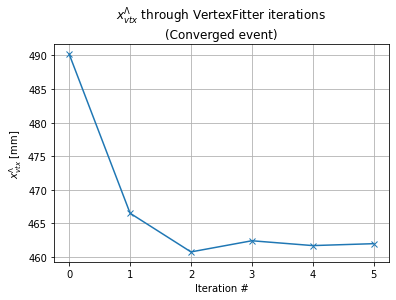

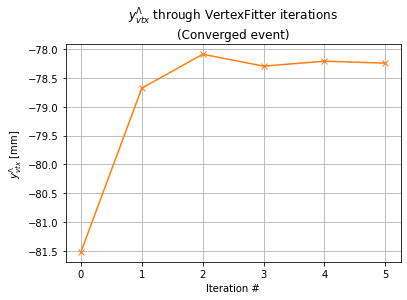

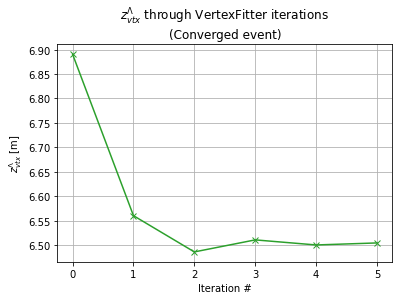

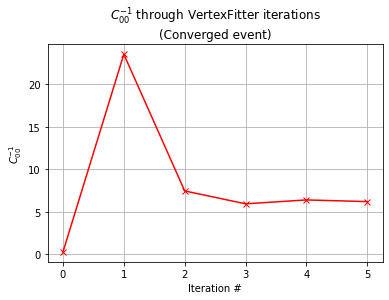

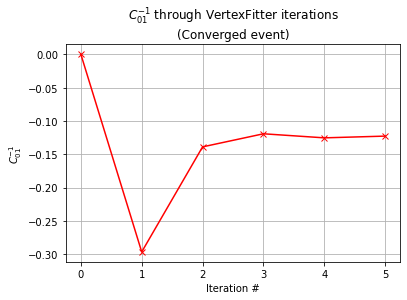

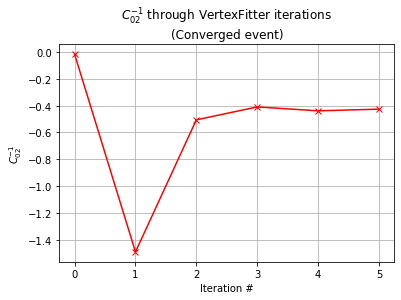

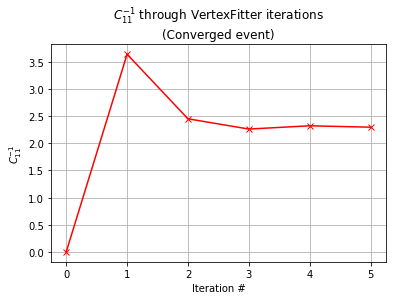

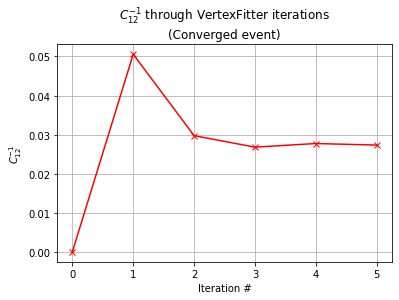

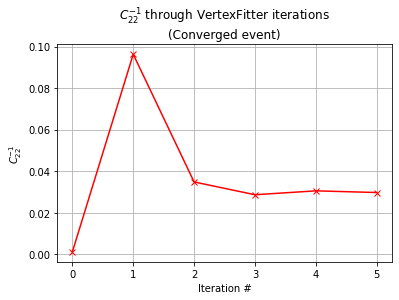

In [10]:
evtIndex = 0

for coord in ['x', 'y', 'z']:
    PlotVertexIterations(evtIndex, coord)
    
for row in range(3):
    for column in range(row, 3):
        PlotInverseCovMatrixIterations(evtIndex, row, column)

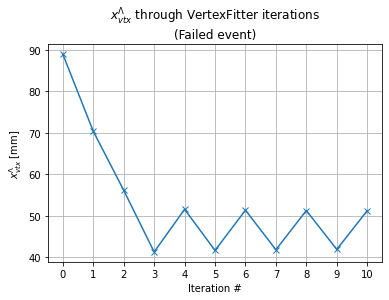

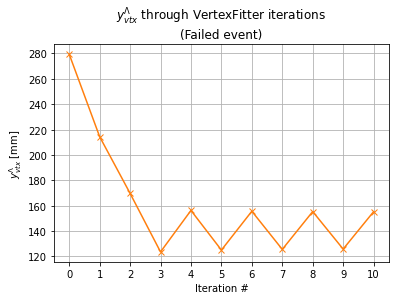

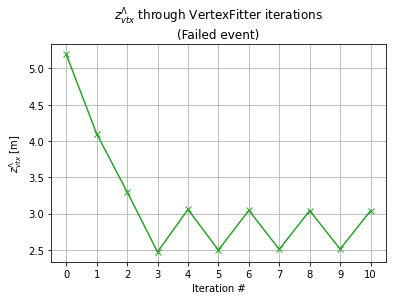

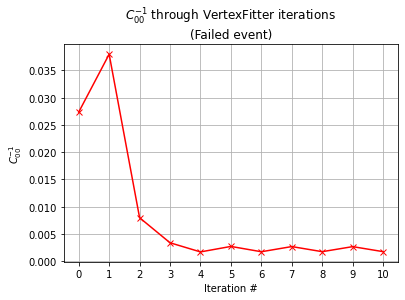

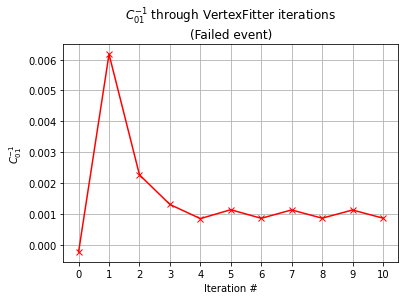

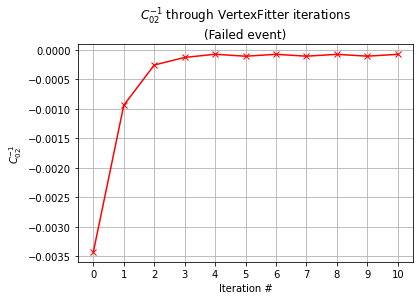

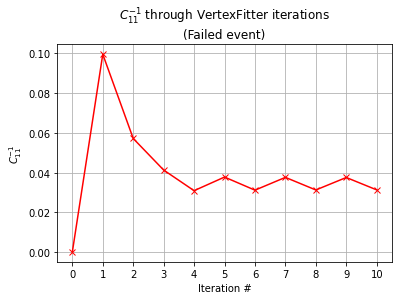

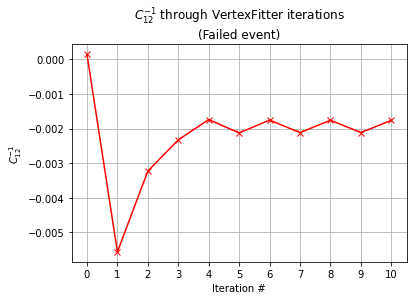

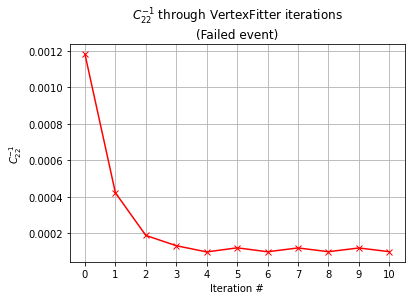

In [11]:
evtIndex = 5

for coord in ['x', 'y', 'z']:
    PlotVertexIterations(evtIndex, coord)

for row in range(3):
    for column in range(row, 3):
        PlotInverseCovMatrixIterations(evtIndex, row, column)